# Worksheet 16

Name:  Haoxuan Sun
UID: U58198360

### Topics

- Logistic Regression

## Logistic Regression

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

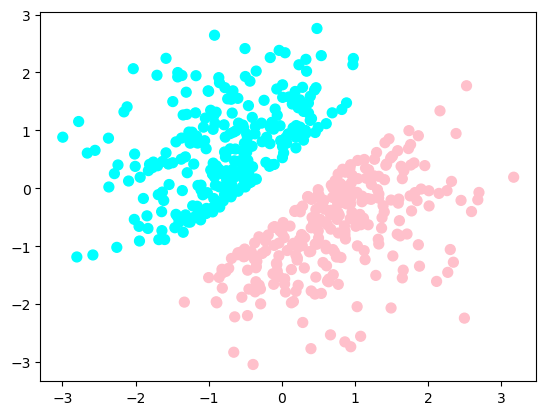

In [43]:
X, Y = generate_line_data()
fig, ax = plt.subplots()
cs = np.array(['cyan', 'pink'])
ax.scatter(X[:, 0], X[:, 1], color = cs[Y].tolist(), s=50, cmap='autumn')

b) Fit a logistic regression model to the data a print out the coefficients.

In [44]:
model = LogisticRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)
beta = model.coef_
intercept = model.intercept_

[[ 4.11337993 -4.10105513]]
[0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

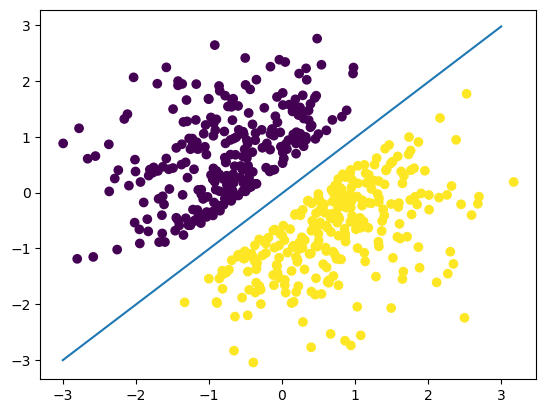

In [45]:
# plot line decision boundary
xplot = np.linspace(-3, 3)
decision_boundary = - intercept / beta[0][0] - beta[0][1] * xplot / beta[0][0]
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.plot(xplot, decision_boundary)
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

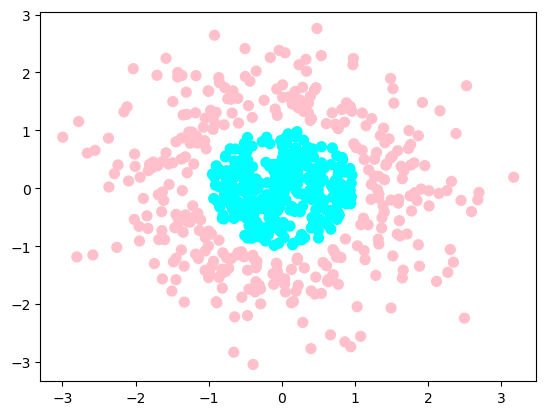

In [46]:
X, Y = generate_circle_data(t)
fig, ax = plt.subplots()
cs = np.array(['cyan', 'pink'])
ax.scatter(X[:, 0], X[:, 1], color = cs[Y].tolist(), s=50, cmap='autumn')

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [47]:
model = make_pipeline(PolynomialFeatures(2),LogisticRegression())
model.fit(X,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

f) Plot the decision boundary using the code below.

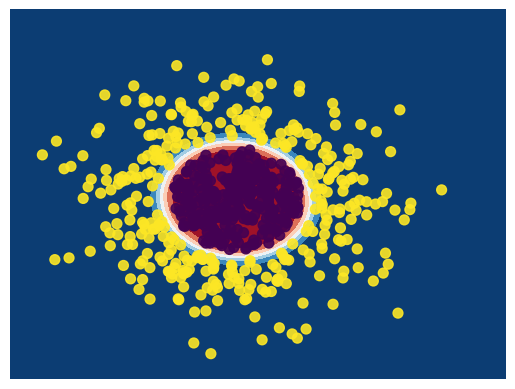

In [48]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

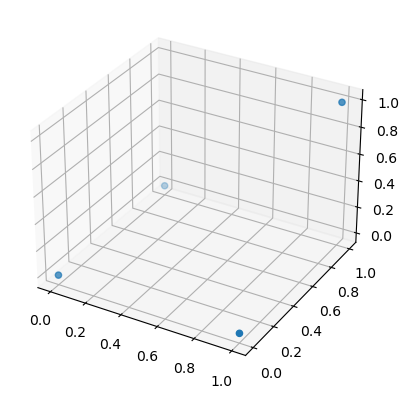

In [49]:
# %matplotlib widget # Requires: pip3 install ipympl

from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,0]*X[:,1])
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+00    |proj g|=  5.00000D-01

At iterate    1    f=  2.67246D+00    |proj g|=  9.88769D-02

At iterate    2    f=  2.66571D+00    |proj g|=  2.97195D-02

At iterate    3    f=  2.66538D+00    |proj g|=  1.94970D-02

At iterate    4    f=  2.66509D+00    |proj g|=  5.52026D-03

At iterate    5    f=  2.66505D+00    |proj g|=  3.43819D-03

At iterate    6    f=  2.66503D+00    |proj g|=  4.28242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

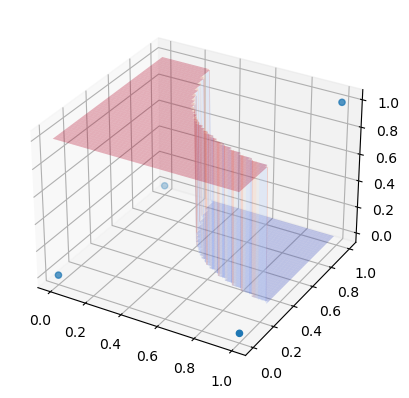

In [50]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)



h = .01
x_min, x_max = X[:, 0].min() , X[:, 0].max()
y_min, y_max = X[:, 1].min() , X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
X_mesh = np.c_[xx.ravel(), yy.ravel()]


# Calculate the decision boundary and plot it
Z = model.predict(X_mesh)
Z = Z.reshape(xx.shape)

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,0]*X[:,1])
ax.plot_surface(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = ...

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

...